In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## 1. What are Probability Distributions?
A probability distribution is a function or a list of all **possible outcomes** of a random variable and their **corresponding probabilities**. It describes the likelihood of each event in a random experiment.

When the number of possible outcomes in a random experiment is very large or infinite, it becomes impractical to list all the outcomes and their probabilities. In such cases, we can use mathematical **functions** to describe the relationship between the outcomes and their probabilities. These functions are known as **probability density functions** (PDF) or **probability mass functions** (PMF), depending on whether the random variable is **continuous** or **discrete**.

### Probabilty Distributions in Statistics
Probability distributions enable us to make scientific experiments from sample data. The ultimate goal of a scientific experiment is to test some hypothesis and make inferences if the hypothesis is true or not using sample data. A sample is only a small representative of the whole population (population is the set of all possible outcomes in the world) and it is not practical at all to get data of the population. Rather, we take samples and using samples we **extrapolate the findings** from sample to population. This extrapolation is almost always done by using probability distributions.

## 2. PDF
A **probability density function** (PDF) is a function that describes the probability distribution of a **continuous** random variable. For example, the height of people is a continuous random variable, and its PDF would give the probability of a person’s height falling within a particular range of values.

The area under a PDF graph (i.e. the integral) represents the probability of the random variable falling within a certain range of values. The total area under the PDF curve is equal to 1, which means that the **sum of all probabilities over all possible values of the random variable is equal to** $1$.

## 3. PMF
On the other hand, a **probability mass function** (PMF) is a function that describes the probability distribution of a **discrete** random variable. For example, rolling 10 dice together is a discrete random variable, and its PMF would give the probability of each possible outcome of rolling the dice.

## 4. CMF
The **cumulative distribution function** (CDF) F(x) describes the probability that a random variable X with a given probability distribution will be found at a value **less than or equal** to $x$.
$$𝐹(x)=𝑃(X<=x)$$

## 5. Common Distributions

### 5.1 Bernoulli distribution
The Bernoulli distribution is probably the simplest distribution in the field of statistics. It simply denotes the probability distribution of a discrete random variable that can take only two values: $0$, $1$.

$X$ tells us whether it will rain tomorrow or not. $X = 1$ denotes that it will rain and $X = 0$ denotes that it will not rain. If the probability that it rains tomorrow is $p$ then, the probability that it will not rain is $1-p$.

So, the PMF for this distribution is:

$$P(X=x) = \left\{\begin{array}{cc} p \text{ , } x = 1 \\ 1 - p \text{ , } x = 0 \end{array}\right\} $$

Or it could simply be represented like this:

$$P(X=x) = p^x (1-p)^{1-x} $$

#### Bernoulli in ML
Probability theory loves a coin toss and a coin toss can be considered as a Bernoulli trial. The toss can result in either a head or a tail — so we have two outcomes. From the point of view of ML, a prediction also can be considered as a Bernoulli trial in cases of **binary classification** problem.

#### Implementation
Let's implement and visualize the Bernoulli distribution.

In [2]:
def plot_bernoulli_distribution(X: np.ndarray, p: float):
    """
    Plots the Bernoulli distribution.
    Args:
        x: The values where the function is evaluated at.
        p: The probability of the random variable taking the value 1.    
    """
    bernoulli = p**X * (1-p)**(1-X)
    plt.figure(figsize=(3,2))
    plt.scatter(X, bernoulli, color = "blue")
    plt.xlabel("x (Head or Tail)")
    plt.ylabel("P(X=x)")
    plt.show()

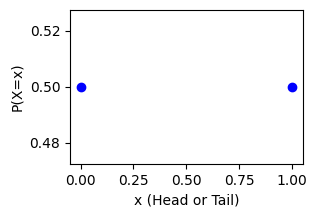

In [3]:
# Plot the Bernoulli distribution for p = 0.5 (coin flip)
x_bernoulli = np.array([0, 1])
plot_bernoulli_distribution(x_bernoulli, 0.5)

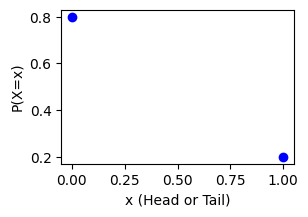

In [4]:
# Plot Bernoulli distribution for p = 0.2 (e.g. the probability to rain tomorrow)
plot_bernoulli_distribution(x_bernoulli, 0.2)

### 5.2 Binomial distribution PMF
Bernoulli trial is always a single trial. What if we do **multiple Bernoulli trials** as part of a single experiment? Like, $n$ number of times? As an example from field of epidemiology, we can test a random set of 1000 subjects for COVID-19.

Let’s define a random variable $X$ that represents the **number of successes** of these $n$ trials/experiments.

For example, let's toss a coin 3 times. And let's say the coin is flawed, and the probability for head is $0.4$. So:
$$ n = 3 $$
$$ X = {0, 1, 2, 3} $$
$$ p = 0.4 $$

We can manually calculate the probability for getting 2 positive outcomes (i.e. heads):
* HHT - $0.4 \times 0.4 \times 0.6$
* HTH - $0.4 \times 0.4 \times 0.6$
* THH - $0.6 \times 0.4 \times 0.4$

The probability of getting any one of the sequences are all identical and it is always equal to $0.4^2 * 0.6$. Since we have three plausible sequences, we can just multiply $0.4^2 * 0.6$ by three to get the probability of getting exactly two heads in three trials.

$$ 0.4^2 \times 0.6 \times 3 = 0.16 \times 0.6 \times 3 = 0.096 \times 3 = 0.288 $$

There is also a combinatorial approach to calculate the probability of picking 2 items out of a sample of 3.

$$ {3 \choose 2} = \frac{3!}{2!\times(3-2)!} = 3 $$
$$ P(X=2) = {3 \choose 2} \times 0.4^2 \times (1 - 0.4)^{3-2} = 0.288 $$

Similarly, we can easily compute $P(X=0)$, $P(X=1)$ and $P(X=3)$ also.

$$ P(X=0) = 0.216 $$
$$ P(X=1) = 0.432 $$
$$ P(X=2) = 0.288 $$
$$ P(X=3) =0.064 $$

Note that if you sum all the four probabilities above, it will equate to $1$.

In [5]:
def calculate_binomial_probabilities(X: np.ndarray, n: int, p: float) -> list[float]:
    """

Let's define a random variable $X$ that represents the **number of successes** of these $n$ trials/experiments.

        X: The values where the function is evaluated at.
        n: The number of trials.
        p: The probability of the random variable taking the value 1.

    Returns: a list of probabilities

    """
    probs = []
    for x in X:
        numerator = math.factorial(n)
        denominator = math.factorial(x) * math.factorial(n - x)
        nCx = numerator / denominator
        prob = nCx * (p ** x) * ((1-p)**(n-x))
        print(f"P(X={x}) = {round(prob, 3)}")
        probs.append(prob)

    return probs

def plot_binomial_distribution(X: np.ndarray, n: int, p: float):
    """
    Plots the Bernoulli distribution.

    Args:
        X: The values where the function is evaluated at.
        n: The number of trials.
        p: The probability of the random variable taking the value 1.    
    """
    X_probabilities = calculate_binomial_probabilities(X, n, p)
    plt.figure(figsize=(3,2))
    plt.scatter(X, X_probabilities, c="b", s=1)
    plt.xlabel("x (number of successes)")
    plt.ylabel("P(X=x)")
    plt.show()

Let's simulate the "toss-a-flawed-coin" experiment.

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


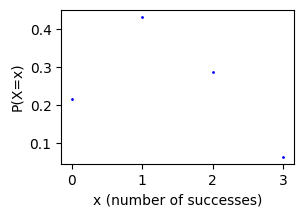

In [6]:
X = [0, 1, 2, 3]    # The num of successes (we will evaluate the probility at thess points)
n = 3               # The number of trials.
p = 0.4             # The probability for success.
plot_binomial_distribution(X, n, p)

Now, let's simulate the same experiment but with 1000 tosses.

P(X=0) = 0.0
P(X=1) = 0.0
P(X=2) = 0.0
P(X=3) = 0.0
P(X=4) = 0.0
P(X=5) = 0.0
P(X=6) = 0.0
P(X=7) = 0.0
P(X=8) = 0.0
P(X=9) = 0.0
P(X=10) = 0.0
P(X=11) = 0.0
P(X=12) = 0.0
P(X=13) = 0.0
P(X=14) = 0.0
P(X=15) = 0.0
P(X=16) = 0.0
P(X=17) = 0.0
P(X=18) = 0.0
P(X=19) = 0.0
P(X=20) = 0.0
P(X=21) = 0.0
P(X=22) = 0.0
P(X=23) = 0.0
P(X=24) = 0.0
P(X=25) = 0.0
P(X=26) = 0.0
P(X=27) = 0.0
P(X=28) = 0.0
P(X=29) = 0.0
P(X=30) = 0.0
P(X=31) = 0.0
P(X=32) = 0.0
P(X=33) = 0.0
P(X=34) = 0.0
P(X=35) = 0.0
P(X=36) = 0.0
P(X=37) = 0.0
P(X=38) = 0.0
P(X=39) = 0.0
P(X=40) = 0.0
P(X=41) = 0.0
P(X=42) = 0.0
P(X=43) = 0.0
P(X=44) = 0.0
P(X=45) = 0.0
P(X=46) = 0.0
P(X=47) = 0.0
P(X=48) = 0.0
P(X=49) = 0.0
P(X=50) = 0.0
P(X=51) = 0.0
P(X=52) = 0.0
P(X=53) = 0.0
P(X=54) = 0.0
P(X=55) = 0.0
P(X=56) = 0.0
P(X=57) = 0.0
P(X=58) = 0.0
P(X=59) = 0.0
P(X=60) = 0.0
P(X=61) = 0.0
P(X=62) = 0.0
P(X=63) = 0.0
P(X=64) = 0.0
P(X=65) = 0.0
P(X=66) = 0.0
P(X=67) = 0.0
P(X=68) = 0.0
P(X=69) = 0.0
P(X=70) = 0.0
P(X=71) = 0.0
P(

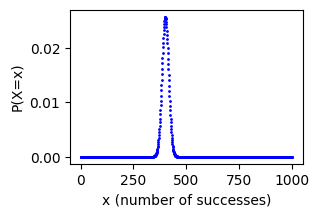

In [7]:
X = np.arange(0, 1000)  # The num of successes (we will evaluate the probility at thess points)
n = 1000                # The number of trials.
p = 0.4                 # The probability for success.
plot_binomial_distribution(X, n, p)

### 5.3 Normal (Gaussian) distribution
The **normal distribution PDF**, which is a bell-shaped curve that is symmetric about the **mean** and has a **fixed variance** (ergo, fixed standard deviation). It is commonly used to model natural phenomena such as heights, weights, and test scores.

Furthermore, the Gaussian distribution is a **generalization of the binomial distribution** as $n \rightarrow \infty$.

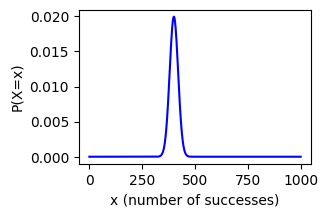

In [8]:
def plot_gaussian_distribution(X: np.ndarray, mean: float, sd: float):
    """
    Plots the symmetric Gaussian (normal) distribution.

    Args:
        X: The values where the function is evaluated at.
        mean: The mean of the distribution.
        sd: The variance (standard deviation)    
    """
    gaussian = scipy.stats.norm.pdf(X, loc = mean, scale = sd)
    plt.figure(figsize=(3,2))
    plt.plot(X, gaussian, color = "blue")
    plt.xlabel("x (number of successes)")
    plt.ylabel("P(X=x)")
    plt.show()

X_gaussian = np.linspace(0, 1000, 1000)
mean = 400
sd = 20
plot_gaussian_distribution(X_gaussian, mean, sd)

Based on the input parameters we can make the bell curve taller or more dispersed.

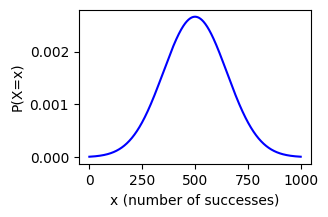

In [9]:
X_gaussian = np.linspace(0, 1000, 1000)
mean = 500
sd = 150
plot_gaussian_distribution(X_gaussian, mean, sd)

#### Why Binomial and Normal distributions looks similar?
The binomial distribution can appear similar to a normal distribution, especially when the number of trials ($n$) is large, due to the **Central Limit Theorem**. This theorem states that the sum of a large number of independent, identically distributed random variables (like Bernoulli trials in a binomial distribution) will tend to a **normal distribution**, regardless of the original distribution's shape.


### 5.4 Log-normal distribution
The log-normal distribution is a **right skewed continuous** probability distribution, meaning it has a **long tail towards the right**. It is used for modelling various natural phenomena such as:
* income distributions
* the length of chess games
* projects (efforts) with diminishing returns.

<center><img src="img/distributions_lognormal.png" alt="Log-normal Distribution" width="430" height="277" /></center>

### 5.5 Poisson distribution
The **Poisson distribution PDF**, which is a discrete distribution that is used to model the probability of a certain number of events occurring in a fixed interval of time or space. The event can be anything, such as the number of visits to a museum in a day, the number of car accidents in a month, or the number of spam messages in your inbox in a week.

Mathematically, the Poisson Distribution can be written as follows:

$$ P(X=x) = \frac{e^{-\lambda} \times \lambda^x}{x!}$$

Where **Mean** = $\lambda$, **Variance** = $\lambda$, **Standard Deviation** = $\lambda$.

#### Example
Let’s say you want to calculate the probability of the number of visits to a museum in a day. You already know that the ****average number of visits** to the museum is $100$ people per day. Using the Poisson Distribution, you can calculate the probability of a particular number of visits in a day. For example, the probability of $105$ visits in a day is:

$$f(105; 100) = (e^{-100}) \times (100^{105}) / 105! = 0.0344$$

This means there is a $1.57%$ chance of $105$ visits to the museum in a day.

In [10]:
def calculate_poisson_probability(x: int, lambd: int) -> float:
  """Calculates the probability of event `x` to happen in case of Poisson distribution with `lambd` parameter."""
  return (math.exp(-lambd) * (lambd**x)) / math.factorial(x) 

# Calculate the probability of 105 visits to the museum in a day 
# With an average of 100 visits per day 
prob = calculate_poisson_probability(105, 100) 
print(prob)

0.034400657738926


P(X=70, lambda=100) = 0.0003
P(X=71, lambda=100) = 0.0004
P(X=72, lambda=100) = 0.0006
P(X=73, lambda=100) = 0.0008
P(X=74, lambda=100) = 0.0011
P(X=75, lambda=100) = 0.0015
P(X=76, lambda=100) = 0.002
P(X=77, lambda=100) = 0.0026
P(X=78, lambda=100) = 0.0033
P(X=79, lambda=100) = 0.0042
P(X=80, lambda=100) = 0.0052
P(X=81, lambda=100) = 0.0064
P(X=82, lambda=100) = 0.0078
P(X=83, lambda=100) = 0.0094
P(X=84, lambda=100) = 0.0112
P(X=85, lambda=100) = 0.0132
P(X=86, lambda=100) = 0.0154
P(X=87, lambda=100) = 0.0176
P(X=88, lambda=100) = 0.0201
P(X=89, lambda=100) = 0.0225
P(X=90, lambda=100) = 0.025
P(X=91, lambda=100) = 0.0275
P(X=92, lambda=100) = 0.0299
P(X=93, lambda=100) = 0.0322
P(X=94, lambda=100) = 0.0342
P(X=95, lambda=100) = 0.036
P(X=96, lambda=100) = 0.0375
P(X=97, lambda=100) = 0.0387
P(X=98, lambda=100) = 0.0395
P(X=99, lambda=100) = 0.0399
P(X=100, lambda=100) = 0.0399
P(X=101, lambda=100) = 0.0395
P(X=102, lambda=100) = 0.0387
P(X=103, lambda=100) = 0.0376
P(X=104, lamb

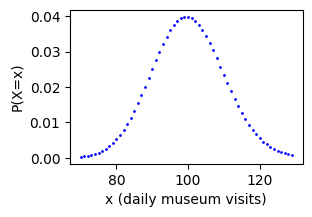

In [11]:
def plot_poisson_distribution(X: np.ndarray, lambd: int):
    """
    Plots the Poisson distribution.

    Args:
        X: The values where the function is evaluated at.
        lambd: The mean and standard deviation of the poisson distribution.   
    """
    X_probabilities = []
    for x in X:
        prob = calculate_poisson_probability(int(x), lambd)
        X_probabilities.append(prob)
        print(f"P(X={x}, lambda={lambd}) = {round(prob, 4)}")
    plt.figure(figsize=(3,2))
    plt.scatter(X, X_probabilities, c="b", s=1)
    plt.xlabel("x (daily museum visits)")
    plt.ylabel("P(X=x)")
    plt.show()

X = np.arange(70, 130)
lambd = 100             # The average number of museum visits.
plot_poisson_distribution(X, lambd)

Here are examples of more distributions:
<center><img src="img/distributions.png" alt="Common Distributions" width="700" height="512" /></center>

## 6. Density Estimation
Density estimation is a statistical technique used to estimate the probability density function (PDF) of a random variable based on a set of observations or data. In simpler terms, it involves estimating the underlying distribution of a set of data points.

Density estimation can be used for a variety of purposes, such as **hypothesis testing**, **data analysis**, and **data visualization**. It is particularly useful in areas such as **machine learning**, where it is often used to estimate the probability distribution of input data or to model the likelihood of certain events or outcomes.

There are various methods for density estimation, including **parametric** and **non- parametric** approaches. Parametric methods assume that the data follows a specific probability distribution (such as a normal distribution), while non- parametric methods do not make any assumptions about the distribution and instead estimate it directly from the data. Commonly used techniques for density estimation include **kernel density estimation (KDE)**, **histogram estimation** and **Gaussian mixture models (GMMs)**. The choice of method depends on the specific characteristics of the data and the intended use of the density estimate.

## References
* [Probability Distribution Functions — PDF, PMF & CDF](https://medium.com/@pankajkumardeora/probability-distribution-functions-pdf-pmf-cdf-ed49e7f5c7f2)
* [Bernoulli Distribution : A brief introduction](https://medium.com/@karthik.k183/bernoulli-distribution-a-brief-introduction-59e53d6deb38)
* [Demystifying the Binomial Distribution](https://medium.com/data-science/demystifying-the-binomial-distribution-580475b2bb2a)
* [Log-normal Distribution - A simple explanation](https://medium.com/data-science/log-normal-distribution-a-simple-explanation-7605864fb67c)
* [Poisson Distribution: 2 Minutes Explanation](https://datasans.medium.com/poisson-distribution-5-minutes-explanation-a4fc8812a38c)